In [1]:
import xarray as xr
import cftime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cartopy as cp
import netCDF4
import h5netcdf
import dask
from matplotlib.pyplot import cm

# Custom package
from icepy.analysis import *

# Some useful lists and dicts
monthletters = ['J','F','M','A','M','J','J','A','S','O','N','D']
monthstr = ['01','02','03','04','05','06','07','08','09','10','11','12']
monthdict = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',
            7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}

In [3]:
data_path_list = [f"~/sea_ice/data/model/CanESM5/nudge+init/winds_201601-201612/sic/1x1/siconc_SImon_CanESM5-c3bnw2-201601e0{e}_dcppA-hindcast_s2015-r{e}i1p2f1_gn_201601-201612.nc" for e in np.arange(1,10)]
data_path_list.append("~/sea_ice/data/model/CanESM5/nudge+init/winds_201601-201612/sic/1x1/siconc_SImon_CanESM5-c3bnw2-201601e10_dcppA-hindcast_s2015-r10i1p2f1_gn_201601-201612.nc")
grid_path = "~/sea_ice/data/grids/grid_1x1.nc"

# open data, each file corresponding to one ENSEMBLE
print("Opening data")
sic_CanESM5_wn2016_init = []
for i,path in enumerate(data_path_list):
    sic = format_time_coord(xr.open_dataset(path),'2016-01','2016-12',freq='M').drop_dims('bnds')
    sic_CanESM5_wn2016_init.append(sic)
grid = xr.open_dataset(grid_path)

# concatenate each ensemble
sic_CanESM5_wn2016_init = xr.concat(sic_CanESM5_wn2016_init,dim='ensemble')

# calculate SIE
sie = []
sie.append(sic_to_sie(sic_CanESM5_wn2016_init, grid, lat_bounds=(-90,0), sic_label='siconc', lat_label='lat', lon_label='lon', ensemble='ave', sic_factor=1e-2).load())
for ens in np.arange(1,10,1):
    sie.append(sic_to_sie(sic_CanESM5_wn2016_init, grid, lat_bounds=(-90,0), sic_label='siconc', lat_label='lat', lon_label='lon', ensemble=ens, sic_factor=1e-2).load())

Opening data


/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/python/icepy/analysis.py:88: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  dataset['time'] = date_range
/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/python/icepy/analysis.py:88: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor

<xarray.Dataset>
Dimensions:  (time: 12, ensemble: 1)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 2016-02-01 ... 2016-12-01
Dimensions without coordinates: ensemble
Data variables:
    SIE      (time, ensemble) float64 4.133 2.705 3.689 ... 16.87 15.08 11.0
<xarray.Dataset>
Dimensions:  (time: 12, ensemble: 1)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 2016-02-01 ... 2016-12-01
Dimensions without coordinates: ensemble
Data variables:
    SIE      (time, ensemble) float64 4.204 2.637 3.643 ... 16.96 15.0 11.05
<xarray.Dataset>
Dimensions:  (time: 12, ensemble: 1)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 2016-02-01 ... 2016-12-01
Dimensions without coordinates: ensemble
Data variables:
    SIE      (time, ensemble) float64 4.195 2.639 3.646 ... 16.86 15.0 11.08


/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/python/icepy/analysis.py:121: UserWarning: rename 'lat' to 'lat' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  grid_area = grid_area.rename({'lat':lat_label,'lon':lon_label})
/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/python/icepy/analysis.py:121: UserWarning: rename 'lon' to 'lon' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  grid_area = grid_area.rename({'lat':lat_label,'lon':lon_label})
/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/python/icepy/analysis.py:121: UserWarning: rename 'lat' to 'lat' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  grid_area = grid_area.rename({'lat':lat_label,'lon':lon_label})
/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/python/icepy/analysis.py:121: UserWarning: rename 'lon' 

<xarray.Dataset>
Dimensions:  (time: 12, ensemble: 1)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 2016-02-01 ... 2016-12-01
Dimensions without coordinates: ensemble
Data variables:
    SIE      (time, ensemble) float64 4.209 2.69 3.683 ... 16.97 15.13 11.3
<xarray.Dataset>
Dimensions:  (time: 12, ensemble: 1)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 2016-02-01 ... 2016-12-01
Dimensions without coordinates: ensemble
Data variables:
    SIE      (time, ensemble) float64 4.216 2.694 3.666 ... 16.94 15.31 11.45
<xarray.Dataset>
Dimensions:  (time: 12, ensemble: 1)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 2016-02-01 ... 2016-12-01
Dimensions without coordinates: ensemble
Data variables:
    SIE      (time, ensemble) float64 4.141 2.678 3.658 ... 16.88 15.2 11.21


/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/python/icepy/analysis.py:121: UserWarning: rename 'lat' to 'lat' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  grid_area = grid_area.rename({'lat':lat_label,'lon':lon_label})
/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/python/icepy/analysis.py:121: UserWarning: rename 'lon' to 'lon' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  grid_area = grid_area.rename({'lat':lat_label,'lon':lon_label})
/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/python/icepy/analysis.py:121: UserWarning: rename 'lat' to 'lat' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  grid_area = grid_area.rename({'lat':lat_label,'lon':lon_label})
/fs/homeu2/eccc/crd/ccrn_shr/rrp000/sea_ice/python/icepy/analysis.py:121: UserWarning: rename 'lon' 

<xarray.Dataset>
Dimensions:  (time: 12, ensemble: 1)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 2016-02-01 ... 2016-12-01
Dimensions without coordinates: ensemble
Data variables:
    SIE      (time, ensemble) float64 4.196 2.622 3.63 ... 16.95 15.1 11.26
<xarray.Dataset>
Dimensions:  (time: 12, ensemble: 1)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 2016-02-01 ... 2016-12-01
Dimensions without coordinates: ensemble
Data variables:
    SIE      (time, ensemble) float64 4.23 2.663 3.623 ... 16.9 15.07 11.15
<xarray.Dataset>
Dimensions:  (time: 12, ensemble: 1)
Coordinates:
  * time     (time) datetime64[ns] 2016-01-01 2016-02-01 ... 2016-12-01
Dimensions without coordinates: ensemble
Data variables:
    SIE      (time, ensemble) float64 4.187 2.669 3.69 ... 16.84 15.14 11.4


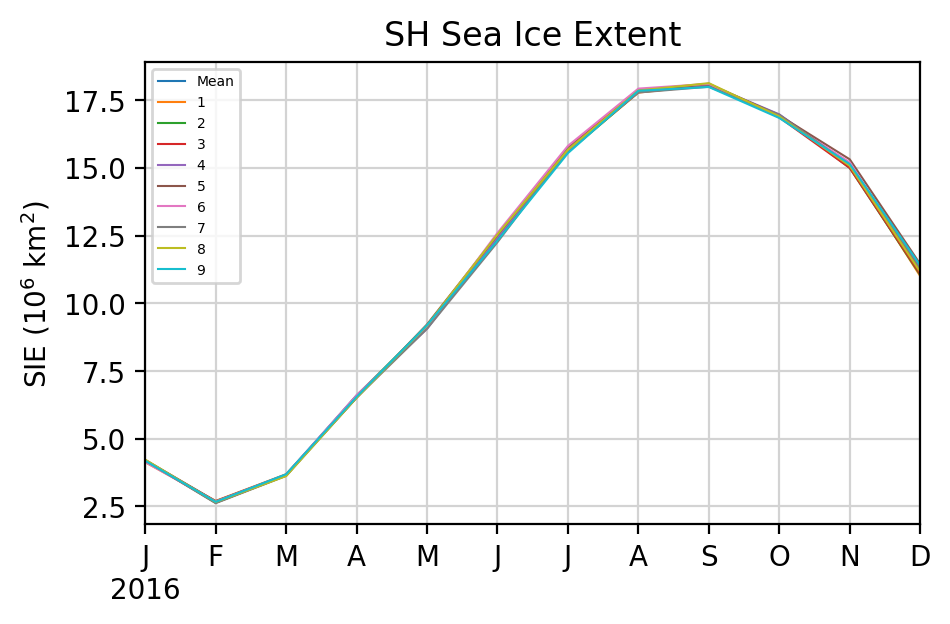

In [10]:
fix,ax=plt.subplots(1,1,figsize=(5,3),dpi=200)

# The data to be plotted, the years over which to plot, labels for legend, etc.
y0,y1 = [2016,2016]
labels = ['Mean',1,2,3,4,5,6,7,8,9]

# Plot the data
for i,data in enumerate(sie):
    data.where((data['time.year']>=y0) & (data['time.year']<=y1),drop=True).to_dataframe().plot.line(ax=ax,linewidth=0.75,legend=True)

# Other details of the plots
xlabels = monthletters*(y1-y0+1)
for i,yr in enumerate(np.arange(y0,y1+1,1)):
    xlabels[12*i] += f'\n{yr}'
ax.set_xlim(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1}-12"))
ax.set_xticks(np.arange(np.datetime64(f"{y0}-01"),np.datetime64(f"{y1+1}-01"),np.timedelta64(1,"M")))
ax.set_xticklabels(xlabels)
ax.set_xlabel(None)
ax.set_ylabel(r"SIE ($10^6\ \mathrm{km}^2$)")
ax.set_title("SH Sea Ice Extent")
ax.grid(color='lightgrey')
ax.legend(labels,fontsize=5)
plt.show()